In [7]:
import pandas as pd
import numpy as np
import requests as r
from itertools import product

# Grab Data From Yelp's API

In [8]:
# Define credentials
url = 'https://api.yelp.com/v3/businesses/search'
key = '8LvBydIYL4eHYUOFKsBos9zvAGdYYO2LWCTvd0K6ePx5rt2M4hne07GJDn_PvZFb4FdgwzJ3xeX790nNBuUL_R25PW17YBnYKmMAXdLLD26b40zpoXce3tHEuaeuYXYx'
headers = {
    'Authorization': 'Bearer %s' % key
}

In [57]:
# Initial Scrape
# Define search parameters
parameters = {
    "location": '11 Century Drive, Greenville, SC 29607',
    'limit': 3,
    'term': 'things to do',
    'radius': 40000 
}

# Run parameters through response and save json as data
response = r.get(url, headers=headers, params = parameters)
data = response.json()
data

# Make sure to walk through the results to ID key data fields


{'businesses': [{'id': '7fcTvfoW_fyGFeKp7Y7oaw',
   'alias': 'falls-park-greenville',
   'name': 'Falls Park',
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/QUViEqhwqw-b-4n5LLur7g/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/falls-park-greenville?adjust_creative=5rJ6NNrCaMon2QalZC-o_Q&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=5rJ6NNrCaMon2QalZC-o_Q',
   'review_count': 196,
   'categories': [{'alias': 'venues', 'title': 'Venues & Event Spaces'},
    {'alias': 'gardens', 'title': 'Botanical Gardens'},
    {'alias': 'parks', 'title': 'Parks'}],
   'rating': 5.0,
   'coordinates': {'latitude': 34.8449957, 'longitude': -82.4020099},
   'transactions': [],
   'location': {'address1': '601 S Main St',
    'address2': '',
    'address3': '',
    'city': 'Greenville',
    'zip_code': '29601',
    'country': 'US',
    'state': 'SC',
    'display_address': ['601 S Main St', 'Greenville, SC 29601']},
   'phone': '+18644674350',
   'disp

In [58]:
# list with 2 addresses
addresses = ['11 Century Drive, Greenville, SC 29607', '307 E McBee Ave, Greenville, SC 29601']
offset = np.arange(0,500,50)

# Create list of tuples of combos betw. addresses and offset
tuples = list(product(addresses, offset))

# View head
tuples[15]

('307 E McBee Ave, Greenville, SC 29601', 250)

In [59]:
# for loop restaurants & bars into list of lists, turn into a dataframe
# Empty list
listings = []

#Future DF columns
cols = ['Name', 'Reviews', 'Rating', 'Address', 'Phone']

# The loopskiii
for address, step in tuples:
    search_parameters = {
        'location': address,
        'term': 'bars' or 'restaurants',
        'radius': 40000,
        'limit': 50,
        'offset': step
    } 
    
    response = r.get(url, headers = headers, params = search_parameters)
    raw_data = response.json()
    for business in raw_data['businesses']:
        name = business['name']
        reviews = business['review_count']
        rating = business['rating']
        location = business['location']['display_address'][0]
        phone = business['display_phone']
        listings.append([name, reviews, rating, location, phone])
    df = pd.DataFrame.from_records(listings, index = 'Name', columns = cols)
print(f'Total Records: {len(df)}')
df.head()

Total Records: 606


,Reviews,Rating,Address,Phone
Name,,,,
Vault & Vator,94,4.0,655 S Main St,(864) 603-1881
Reys,43,4.0,20 N Main St,(864) 326-5712
Neat Bourbon Bar,20,4.5,109 N Main St,
UP On The Roof,426,4.0,250 Riverplace,(864) 242-4000
Yee-Haw Brewing Company,156,4.0,307 E McBee Ave,(864) 605-7770


<AxesSubplot:>

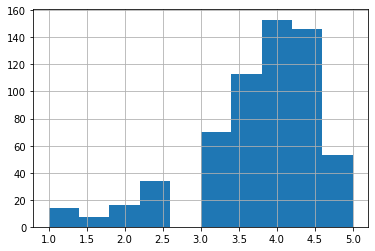

In [60]:
# Explore some ratings
df['Rating'].hist()

<AxesSubplot:>

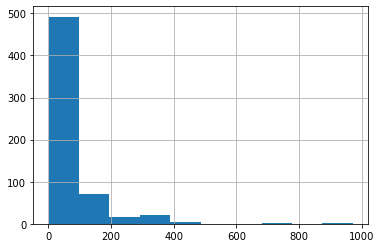

In [61]:
# Explore reviews
df['Reviews'].hist()

# Make a Random Generator 

In [62]:
df.sample()

,Reviews,Rating,Address,Phone
Name,,,,
SIP Whiskey & Wine Bar,168,3.0,103 N Main St,(864) 552-1916
